In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None)

# 21. Find reasonForVisit with highest count of acuity 5 patients.

In [5]:
filtered_df_hosp = df_hosp['EDVisits'].query("Acuity == 5")
print(filtered_df_hosp['ReasonForVisit'].value_counts().idxmax() + ' with ' + str(filtered_df_hosp['ReasonForVisit'].value_counts().max()) + ' visits.')

Chest Pain with 61 visits.


# 22. Find the visit type with maximum 'No Show'.

In [16]:
filtered_df_hosp = df_hosp['AmbulatoryVisits'].query("VisitStatus == 'No Show'")
print(filtered_df_hosp['VisitType'].value_counts().idxmax() + " with " + str(filtered_df_hosp['VisitType'].value_counts().max()) + " No Show(s).")

Telemedicine with 74 No Show(s).


# 23. Get the list of patient ID's which are not there in ReadmissionRegistry.

In [296]:
filtered_df_hosp = df_hosp['Patients'][~df_hosp['Patients'].PatientID.isin(df_hosp['ReAdmissionRegistry']['PatientID'].unique())]
print("Patient IDs not in ReAdmission Registry are:")
print([filtered_df_hosp['PatientID'].to_string(index = False).replace("\n", " ").strip()])

Patient IDs not in ReAdmission Registry are:
['  4 135 145 189 200 224 234 374 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 414 501 562 599 690 691 704 726 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 9

# 24. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

# 25.Using a bar chart, which Service had the lowest count of Expected Mortality?

Text(0.5, 0, 'Expected Mortality')

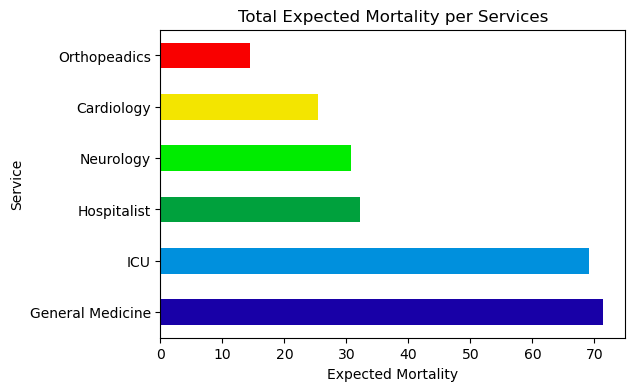

In [304]:
expected_mortality_count = df_hosp['ReAdmissionRegistry'].groupby(['Service'])['ExpectedMortality'].sum().sort_values(ascending = False)
sequential_palette = sns.color_palette("nipy_spectral", len(expected_mortality_count))
plt.figure(figsize = (6, 4))
expected_mortality_count.plot(kind='barh', color = sequential_palette)
plt.title("Total Expected Mortality per Services")
plt.xlabel('Expected Mortality')

# 26. Using arrays and loops, find the count of patients based on gender.

# 27. Which demographic patients are prone to get stroke?

In [162]:
# From ReAdmissionRegistry table
filtered_df_hosp = df_hosp['ReAdmissionRegistry'][df_hosp['ReAdmissionRegistry']['PrimaryDiagnosis'] == "Stroke"]
filtered_df_hosp = df_hosp['Patients'][(df_hosp['Patients'].PatientID.isin(filtered_df_hosp.PatientID))]
print(filtered_df_hosp["Race"].value_counts().idxmax() + "s are more prone to get Stroke")

Black/African-Americans are more prone to get Stroke


In [191]:
# From Discharges table
filtered_df_hosp = df_hosp['Discharges'][df_hosp['Discharges']['PrimaryDiagnosis'] == "Stroke"]
filtered_df_hosp = df_hosp['Patients'][(df_hosp['Patients'].PatientID.isin(filtered_df_hosp.PatientID))]
print(filtered_df_hosp["Race"].value_counts().idxmax() + "s are more prone to get Stroke")

Black/African-Americans are more prone to get Stroke


# 28. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [298]:
filtered_df_hosp = df_hosp['Patients'][df_hosp['Patients'].FirstName.str.contains("lau", case=False) | df_hosp['Patients'].LastName.str.contains("lau", case=False)]
print(filtered_df_hosp.to_string(index = False))

 PatientID FirstName  LastName             DateOfBirth Gender                   Race Language
       283    Lauren    Gaskal 1962-05-08 01:54:00.111 Female Black/African-American  English
       323    Lauren     Foort 1960-06-23 20:07:53.045 Female                  White  English
       370    Zulauf Ellingham 1982-12-17 16:27:56.391 Female                  White  English
       383    Zulauf       LLC 1969-03-16 07:48:49.338 Female                  White  English
       455    Zulauf     Alvar 1961-10-02 08:24:17.334 Female                  White  English
       464    Zulauf    Manske 1965-06-22 02:49:28.667 Female                  White  English
       819    Zulauf  Bitcheno 1967-04-02 07:17:53.635 Female                  White  English
       831    Zulauf O'Shavlan 1970-05-17 08:09:28.988 Female                  White  English
       851     Lemmy   Klausen 1973-06-18 06:19:43.475 Female                  White  English
       907  Jerrilyn   Klausen 1979-09-04 13:05:57.870   Mal

# 29. Display full name of patients who are born in 1986.

In [303]:
filtered_df_hosp = df_hosp['Patients'][(df_hosp['Patients'].DateOfBirth.dt.year == 1986)]
print("Patients born in 1986:")
print((filtered_df_hosp['FirstName'] + ' ' + filtered_df_hosp['LastName']).to_string(index = False))

Patients born in 1986:
    Gabriel  Joseph
    Lincoln  Brenda
        Ala Halpert
       Lolita Darci
     Fadel Bernardt
     Bentley Kippax
        Vale Olanda
      Britt Dureden
   Cristabel Chatel
   Constantia Group
   Morgan Scrowston
         Dom Baglow
    Ignazio Melling
     Homenick Rings
       Hashim Slark
   Ellie Ramsbotham
    Llewellyn Group
         Niles Shaw
         Yvette Inc
      Siouxie Group
        Carly Group
    Worth Pickering
       Arni Baldack
   Kuvalis Coupland
Rebbecca Rollingson
        Wat Fideler


# 30. Retrieve the row with minimum DBP using sorting technique.

In [184]:
for next_dbp in range(1, len(df_hosp['AmbulatoryVisits'])):
    if df_hosp['AmbulatoryVisits']['BloodPressureDiastolic'].loc[0] > df_hosp['AmbulatoryVisits']['BloodPressureDiastolic'].loc[next_dbp]:
        #Swap
        df_hosp['AmbulatoryVisits'].loc[0], df_hosp['AmbulatoryVisits'].loc[next_dbp] = df_hosp['AmbulatoryVisits'].loc[next_dbp], df_hosp['AmbulatoryVisits'].loc[0]

#Print the top most row containing the minimum DBP value        
print(df_hosp['AmbulatoryVisits'].loc[0])            

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 0, dtype: object


# 31. Find the last name of the patients, by getting the first name from the user.

In [214]:
print("Enter the patient's First Name: ")
first_name = input()
first_name_matching_row = df_hosp['Patients'][(df_hosp['Patients'].FirstName.str.contains(first_name, case=False))]
print(first_name_matching_row.FirstName + " " + first_name_matching_row.LastName)

Enter the patient's First Name: 


 lanni


0         Lanni Sue
129    Lanni Angear
dtype: object


# 32. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [324]:
providers = df_hosp['Providers']
print(providers.loc[(providers['ProviderID'].between(11,20)) & (providers['ProviderSpecialty'] == "Surgery")])

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862


#### 33. Which reason of visit has maximum mortality rate.

# 34. Find the count of White Spanish Male.

In [190]:
filtered_df_hosp = df_hosp['Patients'][(df_hosp['Patients']['Race'] == 'White') & (df_hosp['Patients']['Gender'] == 'Male') & (df_hosp['Patients']['Language'] == 'Spanish')]
wite_spanish_male_count = filtered_df_hosp[['Race', 'Gender', 'Language']].value_counts().max()
print(f"There are {wite_spanish_male_count} White Spanish Male patients.")

There are 15 White Spanish Male patients.


# 35. Create a jointplot on expected mortality & expected length of stay.

# 36. Create a heat map on Readmission Registry table to find correlation between columns values.

# 37. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

# 38. Mortality O:E

In [207]:
# table Discharges
filtered_df_hosp = df_hosp['Discharges'][(df_hosp['Discharges']['DischargeDisposition'] == 'Expired')]
observed_mortality = filtered_df_hosp.shape[0]
sum_of_expected_mortality = df_hosp['Discharges']['ExpectedMortality'].sum()
print(sum_of_expected_mortality)

243.40526924839037


# 39. "Create a figure object called fig using plt.figure()
# ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax.
# ** Plot (x,y) on that axes and set the labels.
# Note : You can plot on any x,y set of values."

# 40. Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.